## Data Exploration

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
tweet_df = pd.read_csv("/Users/soliufatai/Documents/Personal Documents/Data Science_ML_AI_Krish Naik/Complete-Data-Science-With-Machine-Learning-And-NLP-2024-main/2-Introduction/Intro/emotion-text-ml/data/raw/tweet_eval_train.csv")

In [138]:
tweet_df.head(10)

,text,label,emotion
0,“Worry is a down payment on a problem you may ...,2,optimism
1,My roommate: it's okay that we can't spell bec...,0,anger
2,No but that's so cute. Atsu was probably shy a...,1,joy
3,Rooneys fucking untouchable isn't he? Been fuc...,0,anger
4,it's pretty depressing when u hit pan on ur fa...,3,sadness
5,@user but your pussy was weak from what I hear...,0,anger
6,Making that yearly transition from excited and...,3,sadness
7,Tiller and breezy should do a collab album. Ra...,1,joy
8,@user broadband is shocking regretting signing...,0,anger
9,@user Look at those teef! #growl,0,anger


In [139]:
# No of samples & missing values
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3257 entries, 0 to 3256
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     3257 non-null   object
 1   label    3257 non-null   int64 
 2   emotion  3257 non-null   object
dtypes: int64(1), object(2)
memory usage: 76.5+ KB


In [140]:
## Count of unique classes

unique_classes = tweet_df['emotion'].unique()
unique_classes_counts = tweet_df['emotion'].nunique()
value_counts = tweet_df['emotion'].value_counts()

print(f'unique emotions are:{unique_classes}')
print(f'unique emotion counts: {unique_classes_counts}')
print(f'No of occurence of each emotion class is:{value_counts}')

unique emotions are:['optimism' 'anger' 'joy' 'sadness']
unique emotion counts: 4
No of occurence of each emotion class is:emotion
anger       1400
sadness      855
joy          708
optimism     294
Name: count, dtype: int64


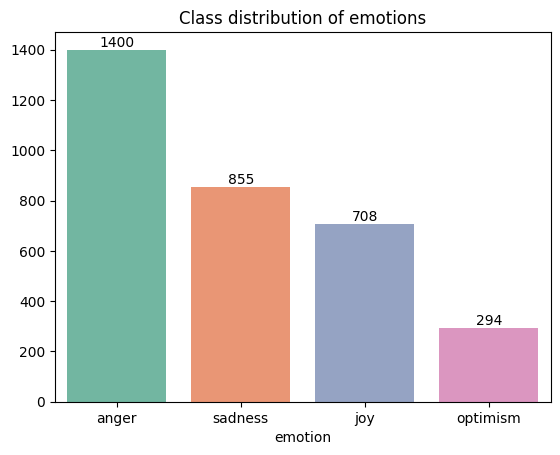

In [141]:
## Bar chart to show class distribution

ax = sns.barplot(
    x = value_counts.index,
    y = value_counts.values,
    hue = value_counts.index
    ,palette="Set2")

ax.set_title("Class distribution of emotions")

## Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize = 10, label_type= 'edge')

The smallest class (optimism) is 5x smaller than anger. Training dataset is imbalanced but still usuable. Minority class still has 294 samples (not too tiny)

In [142]:
## Length Analysis

tweet_df["word_count"] = tweet_df["text"].str.split().str.len()

tweet_df["char_count"] = tweet_df["text"].str.len()


In [143]:
tweet_df.head()

,text,label,emotion,word_count,char_count
0,“Worry is a down payment on a problem you may ...,2,optimism,17,104
1,My roommate: it's okay that we can't spell bec...,0,anger,14,98
2,No but that's so cute. Atsu was probably shy a...,1,joy,18,94
3,Rooneys fucking untouchable isn't he? Been fuc...,0,anger,13,102
4,it's pretty depressing when u hit pan on ur fa...,3,sadness,11,65


In [144]:
## Computing mean & media word_count/char_count by emotion

word_group = (
    tweet_df
    .groupby('emotion')
    .agg(
        avg_word_count=('word_count', 'mean'),
        median_word_count=('word_count', 'median'),
        max_word_count = ('word_count', 'max'),
        min_word_count = ('word_count', 'min'),
        avg_char_count=('char_count', 'mean'),
        median_char_count=('char_count', 'median'),
        max_char_count = ('char_count', 'max'),
        min_char_count=('char_count', 'min')
    )
    .sort_values(by= 'median_word_count', ascending=False)
)

word_group.round(2)

,avg_word_count,median_word_count,max_word_count,min_word_count,avg_char_count,median_char_count,max_char_count,min_char_count
emotion,,,,,,,,
anger,16.69,18.0,32,1,94.32,102.0,146,6
optimism,17.30,18.0,31,3,99.98,109.0,160,18
sadness,15.74,16.0,33,2,87.43,90.0,158,7
joy,15.18,15.0,30,1,86.28,85.0,148,10


The median value is close accros all four categories, indicating the data (word count & char coubt) is symmetric and it is not largely skewed. This also indicate that emotions are not expressed by message length but through language content (need to investigate). but overall, there wont be need for class-specific padding length as word or character are not strong predictor of emotions

In [145]:
## Reset index

word_group = word_group.reset_index()

In [124]:
word_group_reshape

,emotion,word_group,metrics
0,anger,avg_word_count,16.691429
1,optimism,avg_word_count,17.295918
2,sadness,avg_word_count,15.739181
3,joy,avg_word_count,15.176554
4,anger,median_word_count,18.000000
5,optimism,median_word_count,18.000000
6,sadness,median_word_count,16.000000
7,joy,median_word_count,15.000000
8,anger,max_word_count,32.000000
9,optimism,max_word_count,31.000000


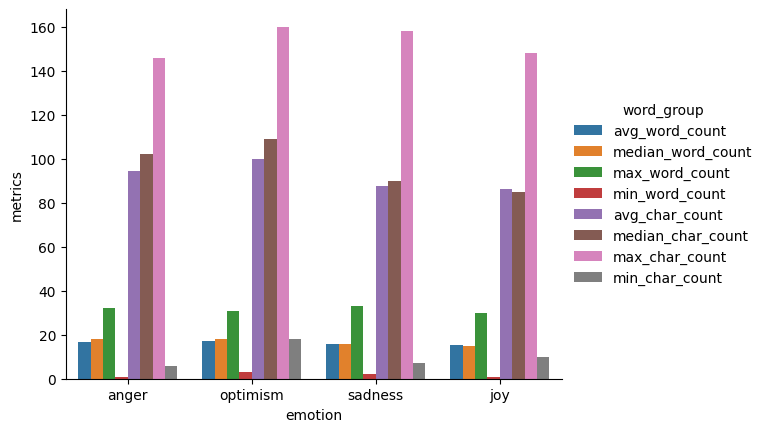

In [146]:
## Create a multiple column bar chart

## Reshape data

word_group_reshape = pd.melt(word_group, id_vars="emotion", var_name="word_group", value_name="metrics")

# Plot a column barchart
ax = sns.barplot(x = "emotion", y = 'metrics', hue = 'word_group', data = word_group_reshape)
ax.spines[['top', 'right']].set_visible(False)
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
